In [1]:
import json
import re
import pandas as pd
import string
import openpyxl
from rapidfuzz import fuzz
import regex

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_affiliation_output_1940_2010.json')
#f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/affs/RES_aff_output_1971_1979.json')#
json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'Journal of Political Economy'
Reference_Data_List = []

for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorscount = len(author_list)
    if len(author_list) == 1:
        author_1 = author_list[0]
        author_2 = ''
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 2:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 3:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 4:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 5:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = ''
    else:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = author_list[5]

    author_1 = author_1.strip()
    author_2 = author_2.strip()
    author_3 = author_3.strip()
    author_4 = author_4.strip()
    author_5 = author_5.strip()
    author_6 = author_6.strip()

    #print(author_list)
    if len(author_list) > 1:
        authors = ",".join(author_list)
        
    else:
        authors = author_list[0]
        stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]
            ref_string = ref_string.title()
            ref_string_1 = re.sub(r"[.*]","",ref_string)

            #reference_string_list = re.findall('\w+\s[\w.-]+\s*\w*\n',ref_string_1)
            reference_string_list = re.findall('.+',ref_string_1)
            #print(reference_string_list)
            #print(authorscount)

            #match = regex.search("("+author_1+"){e<=3}",reference_string_list[1])
            #match = re.search("(Frank H. Knight){e<=3}","Frank H. Knight")

            #print(match.group(0))
            # if regex.search("("+author_1+"){e<=3}",reference_string_list[1]) !=None:
            #     print("True")
            # else:
            #     print("false")

            while regex.search("("+author_1+"){e<=3}",reference_string_list[0]) == None:
                reference_string_list = reference_string_list[1:]
                if len(reference_string_list) == 0:
                    break
            
            ref_list_2 = []
            if reference_string_list != []:
                if len(reference_string_list) >= 2*authorscount:
                    for i in range(2*authorscount):
                        ref_list_2.append(reference_string_list[i])
                else:
                    ref_list_2 = reference_string_list
            
            #print(ref_list_2[0])
           # print(ref_list_2[1])


            if ref_list_2 != []:
                if authorscount == 1:
                    ref_list_2 = ref_list_2[0:2]
                elif authorscount == 2:
                    if len(ref_list_2) >=3:
                        if regex.search("("+author_2+"){e<=3}",ref_list_2[2]) != None:
                            ref_list_2 = ref_list_2[0:4]
                        else:
                            ref_list_2 = ref_list_2[0:2]
                    else:
                        ref_list_2 = ref_list_2[0:2]
                elif authorscount == 3:
                    if len(ref_list_2) >=5:
                        if regex.search("("+author_3+"){e<=3}",ref_list_2[4]) != None:
                            ref_list_2 = ref_list_2[0:6]
                        else:
                            ref_list_2 = ref_list_2[0:2]
                    else:
                        ref_list_2 = ref_list_2[0:2]
                else: 
                    ref_list_2 = ref_list_2[0:9]
                #print(ref_list_2)

            if authorscount == 2 and len(ref_list_2) == 2:
                auths = re.split(' And ',ref_list_2[0])
                affs  = re.split(' And ',ref_list_2[1])
                # if len(affs) == 1:
                #     affs  = re.split(',',ref_list_2[1])
                # if len(auths) == 1:
                #     auths = re.split(' And ',ref_list_2[0])
                #print(affs)
                if len(auths) == 2 and len(affs) == 2:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[1]]
                elif len(auths) == 2 and len(affs) ==1:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[0]]

            if authorscount == 3 and len(ref_list_2) == 2:
                auths = re.split(' And ',ref_list_2[0])
                affs  = re.split(' And ',ref_list_2[1])
                if len(affs) == 2:
                    affs2  = re.split(',',affs[0])
                if len(auths) == 2:
                    auths2 = re.split(' And ',auths[0])
                #print(affs)
                if len(auths) == 3 and len(affs) == 3:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[1],auths[2],affs[2]]
                elif len(auths) == 3 and len(affs) ==1:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[0],auths[2],affs[0]]
                if len(auths) == 2 and len(affs) == 2:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[1]]

                    
            
            reference_string_list = ref_list_2
            if len(reference_string_list) == 1:
                Author1 = reference_string_list[0]
                Affilliation1 = ''
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 2:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 3:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 4:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 5:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]  
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 6:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5]     
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''   
            elif len(reference_string_list) == 7:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 8:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 9:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 10:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 11:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = reference_string_list[10]
                Affilliation6 = ''
            else:
                Author1 = ''
                Affilliation1 = ''
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''

            Author1 = Author1.strip()
            Affilliation1 = Affilliation1.strip()
            Author2 = Author2.strip()
            Affilliation2 = Affilliation2.strip() 
            Author3 = Author3.strip()
            Affilliation3 = Affilliation3.strip()
            Author4 = Author4.strip()
            Affilliation4 = Affilliation4.strip()
            Author5 = Author5.strip()
            Affilliation5 = Affilliation5.strip()
            Author6 = Author6.strip()
#            Affilliation6 = Affilliation6.strip()
# for i in range(1,7):
#     if author_(i) == 0
#     else: 
#         print(no)

    

    a1fuzz = fuzz.ratio(author_1,Author1)
    a2fuzz = fuzz.ratio(author_2,Author2)
                
    #print(Author1)
    Reference_Data_List.append({'Journal_Name' : Journal_Name, 'Article_ID' : Article_ID, 'content_type' : content_type,
    'authorscount':authorscount,
    'Authors' : authors, 'a1fuzz':a1fuzz,'a2fuzz':a2fuzz,
    'author_1':author_1, 'Author1':Author1,
    'author_2':author_2 , 'author_3':author_3, 'author_4':author_4, 'author_5':author_5 , 'author_6':author_6,
    #'stable_url' : stable_url, 
    'Ref_type': Ref_type, 
    'Author1':Author1, 'Affilliation1':Affilliation1, 'Author2':Author2,'Affilliation2':Affilliation2, 'Author3':Author3,'Affilliation3':Affilliation3,
    'Author4':Author4, 'Affilliation4':Affilliation4, 'Author5':Author5, 'Affilliation5':Affilliation5, 'Author6':Author6, 
    'ref_string':ref_string })

Reference_Data = pd.DataFrame.from_records(Reference_Data_List)     
Reference_Data.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010.xlsx')
#Reference_Data.to_excel('/Users/danaebouwer/Documents/Work/Matthew sheets/drive-download-20220901T140508Z-001/JPE/JPE_ref_output_2001_2010/JPE_ref_output_2001_2010.xlsx')

            


            #print(ref_list_2)


            # while fuzz.ratio(author_1,reference_string_list[0]) <30:
            #     #print(fuzz.ratio(author_1,reference_string_list[0]))
            #     reference_string_list = reference_string_list[1:]
            #     #print(author_1)
            #     #print(reference_string_list[0])
            #     #print(fuzz.ratio(author_1,reference_string_list[0]))
            #     if len(reference_string_list) == 0:
            #         break
            # ref_string_reference_string_list = reference_string_list[0:authorscount*2]


            # if re.findall(' and |,',reference_string_list[0]):
            #     x = re.split(' and', reference_string_list[0])
            #     reference_string_list[0] = x[0]
            #     if len(x) == 2:
            #         reference_string_list.append(x[1])
            

            
           # print(fuzz.ratio(author_1,reference_string_list[1]))
            #print(fuzz.ratio(author_1,reference_string_list[2]))

In [164]:
comb = Reference_Data.Affilliation1.value_counts()
comb

University Of Chicago                                              275
Massachusetts Institute Of Technology                              112
Harvard University                                                  93
Princeton University                                                78
Stanford University                                                 76
                                                                  ... 
Economics Research Center, National Opinion Research Center,         1
University Of Illinois At Chicago                                    1
Securities And Exchange Commission                                   1
Baruch College And Graduate Center, City University Of New York      1
Vienna                                                               1
Name: Affilliation1, Length: 1482, dtype: int64

In [175]:
Reference_Data

Journal_Name Article_ID content_type  authorscount  \
0     Journal of Political Economy   26549911      Article             2   
1     Journal of Political Economy   26549912      Article             2   
2     Journal of Political Economy   26549913      Article             2   
3     Journal of Political Economy   26549914      Article             3   
4     Journal of Political Economy   26549915      Article             1   
...                            ...        ...          ...           ...   
4322  Journal of Political Economy    1825909      Article             1   
4323  Journal of Political Economy    1825910      Article             1   
4324  Journal of Political Economy    1825911      Article             1   
4325  Journal of Political Economy    1825912      Article             1   
4326  Journal of Political Economy    1825913      Article             1   

                                                Authors      a1fuzz  a2fuzz  \
0                    Johannes Hörner, Andrzej Skrzypacz   93.333333   100.0   
1          Gabriel Chodorow-Reich, Loukas Karabarbounis  100.000000   100.0   
2                           David Gill, Victoria Prowse  100.000000   100.0   
3     Tobias J. Klein, Christian Lambertz, Konrad O....   96.551724   100.0   
4                                           David Mitch  100.000000   100.0   
...                                                 ...         ...     ...   
4322                                 Richard A. Harvill   97.142857   100.0   
4323                                    Beverly McAnear   93.333333   100.0   
4324                                    Otto Weinberger  100.000000   100.0   
4325                              Frank Traver De Vyver  100.000000   100.0   
4326                                       Gerhard Colm  100.000000   100.0   

                    author_1                 Author1              author_2  \
0            Johannes Hörner         Johannes Hórner     Andrzej Skrzypacz   
1     Gabriel Chodorow-Reich  Gabriel Chodorow-Reich  Loukas Karabarbounis   
2                 David Gill              David Gill       Victoria Prowse   
3            Tobias J. Klein          Tobias J Klein    Christian Lambertz   
4                David Mitch             David Mitch                         
...                      ...                     ...                   ...   
4322      Richard A. Harvill       Richard A Harvill                         
4323         Beverly McAnear         Beverly Mcanear                         
4324         Otto Weinberger         Otto Weinberger                         
4325   Frank Traver De Vyver   Frank Traver De Vyver                         
4326            Gerhard Colm            Gerhard Colm                         

      ...               Author2  \
0     ...     Andrzej Skrzypacz   
1     ...  Loukas Karabarbounis   
2     ...       Victoria Prowse   
3     ...    Christian Lambertz   
4     ...                         
...   ...                   ...   
4322  ...                         
4323  ...                         
4324  ...                         
4325  ...                         
4326  ...                         

                                          Affilliation2         Author3  \
0                                   Stanford University                   
1     University Of Minnesota And National Bureau Of...                   
2                                     Purdue University                   
3                                University Of Mannheim  Konrad O Stahl   
4                                                                         
...                                                 ...             ...   
4322                                                                      
4323                                                                      
4324                                                                      
4325                                                

In [143]:
list1 = ['1','2','3','4','5','6','7']
print(list1)
list1.insert(1,'5')
print(list1)
print(len(list1))

['1', '2', '3', '4', '5', '6', '7']
['1', '5', '2', '3', '4', '5', '6', '7']
8


In [84]:
import regex
x = regex.search("no{e<=4}","nttoi")
print(x.group(0))

nt


In [159]:
ref_list_2 = ['Antonio E Bernardo And Olivier Ledoit', 'University Of California, Los Angeles']
#print(i)
ref_list_2 = ['Patricia Daly, Ernest Olson, And Paul H Douglas',]
authorscount = 2
if authorscount == 2 and len(ref_list_2) == 2:
    auths = re.split(' And ',ref_list_2[0])
    affs  = re.split(' And ',ref_list_2[1])
    # if len(affs) == 1:
    #     affs  = re.split(',',ref_list_2[1])
    # if len(auths) == 1:
    #     auths = re.split(' And ',ref_list_2[0])
    print(affs)
    if len(auths) == 2 and len(affs) == 2:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[1]]
    elif len(auths) == 2 and len(affs) ==1:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[0]]

if authorscount == 3 and len(ref_list_2) == 2:
    auths = re.split(' And ',ref_list_2[0])
    affs  = re.split(' And ',ref_list_2[1])
    if len(affs) == 2:
         affs2  = re.split(',',affs[0])
    if len(auths) == 2:
         auths2 = re.split(' And ',auths[0])
    #print(affs)
    if len(auths) == 3 and len(affs) == 3:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[1],auths[2],affs[2]]
    elif len(auths) == 3 and len(affs) ==1:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[0],auths[2],affs[0]]

print(ref_list_2)

['University Of California, Los Angeles']
['Antonio E Bernardo', 'University Of California, Los Angeles', 'Olivier Ledoit', 'University Of California, Los Angeles']


In [101]:
list1 = ['1','2','3']
authorscount = 2
ref_list_2 = []

for i in range(authorscount):
    ref_list_2.append(reference_string_list[i])

print(ref_list_2)

['John G Cragg, Arnold C Harberger, And Peter Mieszkowski', 'University Of British Columbia, University Of Chicago, And Yale University']


In [170]:
True_count = 0
False_count = 0
for item in Reference_Data['a1fuzz']:
    if item >75:
        True_count += 1
    else:
        False_count +=1
print(True_count)
print(False_count)
print(True_count/(True_count+False_count))

4016
311
0.9281257222093829


In [173]:
True_count = 0
False_count = 0
for item in Reference_Data['a2fuzz']:
    if item >75:
        True_count += 1
    else:
        False_count +=1
print(True_count)
print(False_count)
print(True_count/(True_count+False_count))

3998
329
0.9239657961636237


In [85]:
import pandas as pd

JPE_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_processed.xlsx')
list = JPE_master.stable_url.str.split("/", expand = True)

for i in range(len(JPE_master)):
    if(list.iat[i,5] is None):
        list.iat[i,5] = list.iat[i,4]
        print(list.iat[0,5])
    else:
        list.iat[i,5] = list.iat[i,5]

JPE_master['Article_ID'] = list[5] 

print(JPE_master['Article_ID'] .head(10))
print(JPE_master.shape)

JPE_master = JPE_master.loc[JPE_master['content_type'] == 'Article']
print(JPE_master.shape)

26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
2

In [84]:
list[5]

0        26549909
1        26549910
2        26549911
3        26549912
4        26549913
           ...   
13926        None
13927        None
13928        None
13929        None
13930        None
Name: 5, Length: 13931, dtype: object

In [81]:
JPE_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_processed.xlsx')
list = JPE_master.stable_url.str.split("/", expand = True)

#print(list.iat[0,5])
for i in range(30):
    if(list.iat[i,5] is None):
        list.iat[i,5] = list.iat[i,4]
        print(list.iat[0,5])
    else:
        list.iat[i,5] = list.iat[i,5]

#print(list.iat[0,5])
#if list

26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909


for i in articles.index:
    if articles.loc[i,0]>=50:
        print(i[0])
        found=All[All['id']==i[0]]
        print(found['Jstor_journal'].values[0])
        print("D:\\docs\\Masters\\Data\\"+found['Jstor_journal'].values[0]+"_data\\"+i[0]+"_wo_cover.pdf")
        shell_process = subprocess.Popen(["D:\\docs\\Masters\\Data\\"+found['Jstor_journal'].values[0]+"_data\\"+i[0]+".pdf"],shell=True)
        content_type=input()
        clean_out_list.append({"id" : i[0],"content_type" : content

In [87]:
JPE_merged = pd.merge(Reference_Data, JPE_master,
on = 'Article_ID' , how = "inner" , indicator = True)

R1 = JPE_merged[JPE_merged['_merge']=='both']
R2 = JPE_merged[JPE_merged['_merge']=='left_only']
R3 = JPE_merged[JPE_merged['_merge']=='right_only']

print(JPE_merged.shape, R1.shape, R2.shape, R3.shape)
JPE_merged.head(5)
JPE_merged.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_merged.xlsx')


(4026, 39) (4026, 39) (0, 39) (0, 39)


In [88]:
comb2 = JPE_merged._merge.value_counts()
comb2

both          4026
left_only        0
right_only       0
Name: _merge, dtype: int64

In [92]:
new = JPE_merged[['year','Affilliation1','Affilliation2','Affilliation3','Affilliation4']]
new.head(5)
new.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPEaffdata.xlsx')

In [121]:
comb2 = new.Affilliation1.value_counts()
comb2
# solution here

df_val_counts = pd.DataFrame(comb2)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['unique_values', 'counts']
df_value_counts_reset.iat[0,0]
print(len(new.Affilliation1.value_counts()))

1409


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1729558258.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'aff1':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1729558258.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'aff1':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1729558258.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'aff1':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1729558258.py:7: Fut

(4011, 2)

In [183]:
aff1 = JPE_merged[['year','Affilliation1']]
aff1 = aff1.dropna(subset=['Affilliation1'])
aff1 = JPE_merged[['year','Affilliation1']]
aff1 = aff1.dropna(subset=['Affilliation1'])

aff1v2 = pd.DataFrame()
for i in range(len(aff1)):
    if aff1.iat[i,1] != '':
        aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)

#aff1v2.rename(columns={"year": "year", "Affilliation1": "Affilliation"}, inplace = True)
#print(aff1.head)

aff2 = JPE_merged[['year','Affilliation2']]
#aff2 = aff2.dropna(subset=['Affilliation2'])
#aff2.rename(columns={"year": "year", "Affilliation2": "Affilliation"},inplace = True)
aff2v2 = pd.DataFrame()
for i in range(len(aff2)):
    if aff2.iat[i,1] != '':
        aff2v2 = aff2v2.append({'year': aff2.iat[i,0], 'Affilliation':aff2.iat[i,1]},ignore_index=True)

aff3 = JPE_merged[['year','Affilliation3']]
#aff3.rename(columns={"year": "year", "Affilliation3": "Affilliation"},inplace = True)
aff3v2 = pd.DataFrame()
for i in range(len(aff3)):
    if aff3.iat[i,1] != '':
        aff3v2 = aff3v2.append({'year': aff3.iat[i,0], 'Affilliation':aff3.iat[i,1]},ignore_index=True)

aff4 = JPE_merged[['year','Affilliation4']]
#aff4.rename(columns={"year": "year", "Affilliation4": "Affilliation"},inplace = True)
aff4v2 = pd.DataFrame()
for i in range(len(aff4)):
    if aff4.iat[i,1] != '':
        aff4v2 = aff4v2.append({'year': aff4.iat[i,0], 'Affilliation':aff4.iat[i,1]},ignore_index=True)


#print(aff1.shape,aff2.shape)
#print(aff2.head)
df1 = aff1v2.append(aff2v2, ignore_index=True)
df2 = df1.append(aff3v2, ignore_index=True)
df3 = df2.append(aff4v2, ignore_index=True)
print(df3.shape)
print(df3.head)

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56

(5521, 2)
<bound method NDFrame.head of       year                                       Affilliation
0     2016                                    Yale University
1     2016  Harvard University And National Bureau Of Econ...
2     2016                                  Purdue University
3     2016                                 Tilburg University
4     2016           University Of Maryland, Baltimore County
...    ...                                                ...
5516  1988                                  Tulane University
5517  1985                             University Of Colorado
5518  1970                                        Carl Hemmer
5519  1954            Dealing With Hartford, Connecticut, And
5520  1942  Been Synthesized In A Plan For A Commodity Res...

[5521 rows x 2 columns]>


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff4v2 = aff4v2.append({'year': aff4.iat[i,0], 'Affilliation':aff4.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff4v2 = aff4v2.append({'year': aff4.iat[i,0], 'Affilliation':aff4.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = aff1v2.append(aff2v2, ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1629712794.py:40: FutureWarning: The frame

In [148]:
new['year']
print(new.shape)
newer = new.loc[new['year'] == 1940]
print(newer.shape)

(4026, 5)
(39, 5)


In [184]:

testing = pd.DataFrame()
for i in range(1940,2017):
    #if new['year'] == 1940:
        #newer = new.loc[new['year'] == i]
        newer = df3.loc[df3['year'] == i]

        for x in range(len(newer.Affilliation.value_counts())):
            comb2 = newer.Affilliation.value_counts()
            comb2
            df_val_counts = pd.DataFrame(comb2)
            df_value_counts_reset = df_val_counts.reset_index()
            df_value_counts_reset.columns = ['unique_values', 'counts']
            a = df_value_counts_reset.iat[x,0]
            b = df_value_counts_reset.iat[x,1]
            testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
            #testing[0] = testing[0].append(i)
            #print(i)
            #print(df_value_counts_reset.iat[x,0])
            #print(df_value_counts_reset.iat[x,1])
            #testing[1] = df_value_counts_reset.iat[x,0]
            #testing[2] = df_value_counts_reset.iat[x,1]

print(testing)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append 

      year                                               aff1  count
0     1940                                New York University      4
1     1940                            University Of Minnesota      3
2     1940                              University Of Chicago      3
3     1940                                    Duke University      3
4     1940                       US Department Of Agriculture      2
...    ...                                                ...    ...
3977  2016  Tulane University, Institute For The Study Of ...      1
3978  2016  Cornell University And Einaudi Institute For E...      1
3979  2016  Massachusetts Institute Of Technology And Nati...      1
3980  2016  University Of Minnesota And National Bureau Of...      1
3981  2016                                 Michael Greenstone      1

[3982 rows x 3 columns]


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/1674070614.py:15: FutureWarning: The frame.append 

In [185]:
testing.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/testinggrouped.xlsx')

In [201]:
testing['aff_cum_counts'] = testing.groupby('aff1').cumcount()
testing.tail()
#testing.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/testinggrouped.xlsx')

df3 = df3.sort_values(by=['year'])
df3['aff_cum_counts'] = df3.groupby('Affilliation').cumcount()
df3.tail()
df3.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/df3.xlsx')

In [229]:
df4 = df3.iloc[-30:,:]
df4.iat[2,0] 
df4.head()

year                                       Affilliation  aff_cum_counts
3     2016                                 Tilburg University               3
2     2016                                  Purdue University              20
1     2016  Harvard University And National Bureau Of Econ...              38
4042  2016                                         World Bank              16
4014  2016                             University Of Mannheim               1

In [219]:
df5 = pd.DataFrame()
df4 = df3.iloc[-30:,:]
for i in range(len(df4)):
    if df4.iat[i,2] >= 30:
        df5 = df5.append({'year': df4.iat[i,0], 'aff': df4.iat[i,1] ,'count': df4.iat[i,2]},ignore_index=True)

df5

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/3333898335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append({'year': df4.iat[i,0], 'aff': df4.iat[i,1] ,'count': df4.iat[i,2]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/3333898335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append({'year': df4.iat[i,0], 'aff': df4.iat[i,1] ,'count': df4.iat[i,2]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_56406/3333898335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append({'year': df4.iat[i,0], 'aff': df4.iat[i,1] ,'count': df4.iat[i,2]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f4

year                                                aff  count
0  2016  Harvard University And National Bureau Of Econ...     38
1  2016                                Columbia University     85
2  2016                                 Harvard University    124
3  2016                         London School Of Economics     41
4  2016              Massachusetts Institute Of Technology    132
5  2016                                Stanford University     96
6  2016                                    Yale University     80

In [234]:
# Identify target column for each row
out = df4.assign(col=df5.groupby('aff').cumcount().astype(str)) \
        .pivot(index=['year'], columns='aff', values=['count']) \
        .ffill(axis=1)

# Sort columns according your output
out = out.sort_index(level=[1, 0], axis=1, ascending=[True, False])

# Flat the multiindex column
out.columns = out.columns.to_flat_index().str.join('_')

# Reset index
out = out.reset_index()

KeyError: 'aff'

In [225]:
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())

TypeError: 'DataFrame' object is not callable

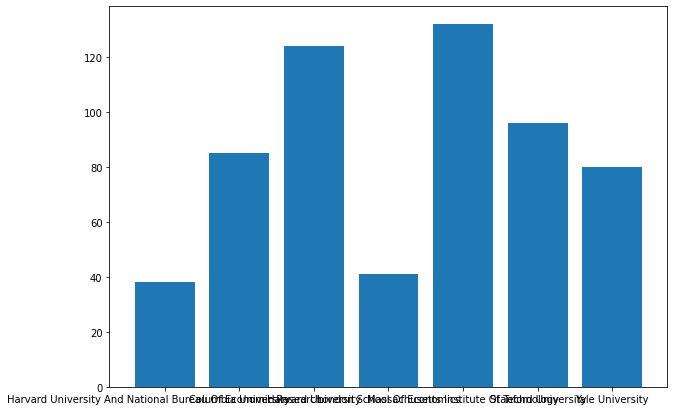

In [227]:
import pandas as pd
from matplotlib import pyplot as plt
 
# Read CSV into pandas
 
name = df5['aff']
price = df5['count']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], price[0:10])
 
# Show Plot
plt.show()